# <font color=darkred><center>CLAREYAMAR <br>
### <font color=gold><center>Clara Lelis, Yasmin Shimizu, Gabriel Martins<br>
 <font color=darkred><center>*Inluminans Ignotus*☀️🌊
 
<font color=black><center>Divisão responsável pela segurança das águas territoriais e regiões portuárias do reino de Lumi, iluminando a escuridão dos mares e as profundezas do oceano.
### <font color=blue><center> Quests 1
<font color=black><center> Nos seus primeiros dias em Lumi, a divisão Clareyamar visitou a Taverna do Sol, buscando possíveis informações sobre o despertar de seus poderes de luz e a localização do deus Pheabus. Assim, o grupo descobre a cultura dos Murais de Quests e decidem ajudar a população local com seus pedidos, visando conhecer melhor a região, os seus habitantes e adquirir mais informações para sua missão principal de libertação da Aurora de Netuno.
    
##### <font color=darkred><center> Missão 2: Familizarizando-se com datasets didáticos
<div class="alert alert-warning">
<center> "O módulo seaborn tem vários datasets didáticos embutidos nele. Veja a função load_dataset no link https://seaborn.pydata.org/generated/seaborn.load_dataset.html para se informar mais. Seu objetivo é explorar pelo menos 3 datasets deste repositório. Espera-se que os datasets sejam carregados e exibidos. É necessário buscar o que significa cada coluna do dataset e escrever de maneira clara na entrega. Faça pelo menos um gráfico utilizando estes dados e compute algumas estatísticas descritivas. Discuta brevemente sobre o que observou."
</div>
    
#### <font color=darkred><center> Introdução da missão 2<br>
<font color=black>Buscando aumentar o arquivo da Biblioteca Real, a divisão Clareyamar - responsável pela segurança das águas e regiões portuárias de Lumi - reuniou três conjuntos de dados relacionados aos nossos mares, oceanos e outros fenômenos hídricos, fazendo uma análise de dados sobre o naufrágio do Titanic, do gêiser Old Faithful e os pinguins do Arquipélago Palmer. Tais informaçoes foram registradas em forma de gráficos e estatísticas descritivas, além de suas discussões, sendo, ao final da análise, deixadas nas mãos da diretora da Biblioteca Real, Dra.Diana Ditatolov.
    

In [1]:
import seaborn as sb
import statistics as st
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def regressao_linear_simples(x, y):
    media_x = np.mean(x)
    media_y = np.mean(y)

    beta_1 = sum((x - media_x) * (y - media_y)) / sum((x - media_x) ** 2)
    beta_0 = media_y - beta_1 * media_x

    return beta_0, beta_1

### Dataset - Titanic

O *dataset* "titanic" do *Seaborn* apresenta dados referentes ao naufrágio do famoso navio Titanic, fazendo a relação de algumas observações com os passageiros na única viagem da embarcação. Dentre as diversas informações sobre os 890 passageiros que estavam no Titanic, estão:
- A coluna **survived** informa se a pessoa morreu ou não, *0* para morreu e *1* para sobreviveu;
- A coluna **pclass** informa o número da classe em que a pessoa viajou;
- A coluna **sex** informa o sexo do passageiro;
- A coluna **age** informa a idade do indivíduo;
- A coluna **sibsp** informa a quantidade de irmãos, irmãs e cônjuges de determinada pessoa que estavam no Titanic;
- A coluna **parch** informa a quantidade pais, mães ou filhos de alguém que estavam no Titanic;
- A coluna **fare** informa o valor que cada indivíduo pagou na sua passagem;
- A coluna **embarked** informa a cidade de embarque, *S* para Southampton, *C* para Cherbourg e *Q* para Queenstown;
- A coluna **class** informa a classe de maneira extensa, e não numérica;
- A coluna **who** informa o sexo, porém com outras palavras;
- A coluna **adult_male** informa se o indivíduo é homem ou não;
- A coluna **deck** parece se referir ao porto que a pessoa embarcou, mas não encontrei a informação exata;
- A coluna **embark_town** informa de maneira extensiva a cidade de embarque do passageiro;
- A coluna **alive** informa de a pessoa sobreviveu ou não, mas de maneira extensiva, com sim ou não;
- A coluna **alone** informa se a pessoa estava acompanhada ou não.

In [4]:
df_t = sb.load_dataset('titanic')
df_t.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


#### Qual a relação entre a classe dos passagens e os mortos?

In [5]:
classes = df_t['pclass']
classe1 = 0
classe2 = 0
classe3 = 0
for i in classes:
    if i == 1:
        classe1 += 1
    elif i == 2:
        classe2 += 1
    elif i == 3:
        classe3 += 1
        
print('Haviam', classe1,'passageiros da Primeira Classe.')
print('Haviam', classe2,'passageiros da Segunda Classe.')
print('Haviam', classe3,'passageiros da Terceira Classe.')

Haviam 216 passageiros da Primeira Classe.
Haviam 184 passageiros da Segunda Classe.
Haviam 491 passageiros da Terceira Classe.


In [6]:
colunas_espec = df_t[['alive','pclass']]
mort_1 = 0
mort_2 = 0
mort_3 = 0

for i, n in zip(colunas_espec['alive'], colunas_espec['pclass']):
    if i == 'no':
        if n == 1:
            mort_1 += 1
        if n == 2:
            mort_2 += 1
        if n == 3:
            mort_3 += 1
            
vivos_1 = classe1 - mort_1
vivos_2 = classe2 - mort_2
vivos_3 = classe3 - mort_3

print('Sobreviveram',vivos_1, 'pessoas da Primeira Classe.')
print('Sobreviveram',vivos_2, 'pessoas da Segunda Classe.')
print('Sobreviveram',vivos_3, 'pessoas da Terceira Classe.')
print(" ")
print('Morreram',mort_1,'passageiros da Primeira Classe.')
print('Morreram',mort_2,'passageiros da Segunda Classe.')
print('Morreram',mort_3,'passageiros da Terceira Classe.')

Sobreviveram 136 pessoas da Primeira Classe.
Sobreviveram 87 pessoas da Segunda Classe.
Sobreviveram 119 pessoas da Terceira Classe.
 
Morreram 80 passageiros da Primeira Classe.
Morreram 97 passageiros da Segunda Classe.
Morreram 372 passageiros da Terceira Classe.


Text(0.5, 1.0, 'De qual classe eram as pessoas que morreram?')

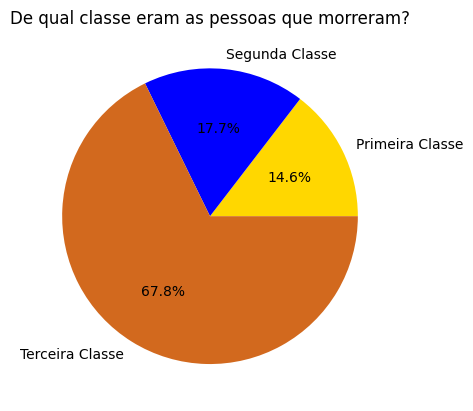

In [7]:
cores=['gold','blue','chocolate']
labels  = ["Primeira Classe", "Segunda Classe", "Terceira Classe"]
plt.pie([mort_1,mort_2,mort_3], labels=labels, autopct='%1.1f%%',colors=cores)
plt.title('De qual classe eram as pessoas que morreram?')

Text(0.5, 1.0, 'Passageiros da Terceira Classe do Titanic')

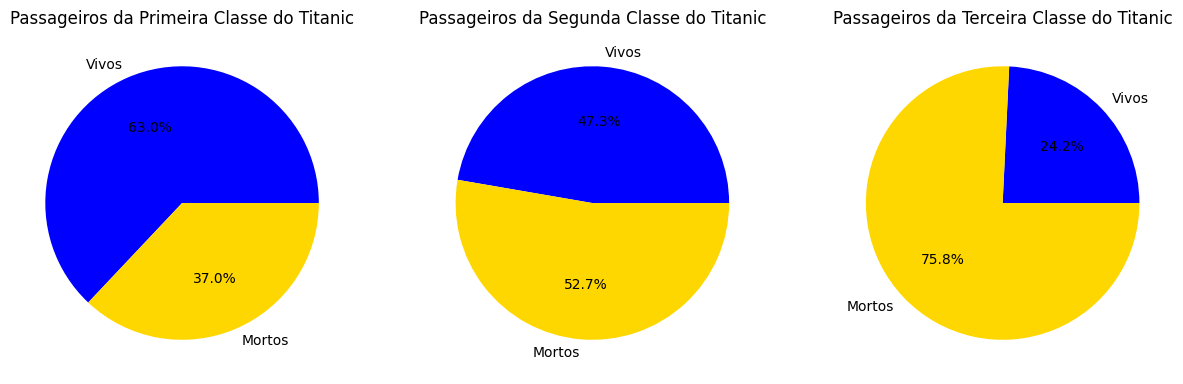

In [8]:
labels = ['Vivos','Mortos']
sizes1 = [vivos_1,mort_1]
sizes2 = [vivos_2,mort_2]
sizes3 = [vivos_3,mort_3]
cores = ['blue','gold']

fig, splt = plt.subplots(1, 3, figsize=(15, 5))
# Gráfico da Primeira Classe
splt[0].pie(sizes1, labels=labels, colors=cores, autopct='%1.1f%%')
splt[0].set_title('Passageiros da Primeira Classe do Titanic')

# Gráfico da Segunda Classe
splt[1].pie(sizes2, labels=labels, colors=cores, autopct='%1.1f%%')
splt[1].set_title('Passageiros da Segunda Classe do Titanic')

# Gráfico da Terceira Classe
splt[2].pie(sizes3, labels=labels, colors=cores, autopct='%1.1f%%')
splt[2].set_title('Passageiros da Terceira Classe do Titanic')

O primeiro gráfico mostra que mais de 2/3 dos mortos eram da terceira classe. Porém, essa observação não é muito conclusiva, pois a maioria dos passageiros do Titanic também eram da terceira classe. Portanto, é necessário uma observação mais seccionada em cada classe, o que foi feito com outros gráficos de pizza. Estes três gráficos mostram as diferentes proporções de vítimas nas 3 classes. O que se pode concluir através da pergunta e dos gráficos é que a proporção de mortos da terceira classe é muito maior do que da primeira, refletindo o fato de que a primeira classe recebeu prioridade no uso dos botes salva-vidas e no fácil acesso às partes externas do navio.

#### Mas como eram esses passageiros?

In [9]:
quant_mul=df_t['sex'].value_counts().get('female')
quant_hom=df_t['sex'].value_counts().get('male')

print('Haviam', quant_mul,'mulheres no navio.')
print('Haviam', quant_hom,'homens no navio.')

Haviam 314 mulheres no navio.
Haviam 577 homens no navio.


In [10]:
print("As idades mínima e máxima entre os passageiros do Titanic era de", [min(df_t["age"]) , max(df_t["age"])], "anos.")

med_idade = df_t["age"].mean()
print('A média de idade dos passageiros do Titanic era de',round(med_idade,2), 'anos')

df_t = df_t.dropna(subset=['age'])
desv_pad = st.pstdev(df_t["age"])
print('O desvio padrão dessa média foi de',round(desv_pad,2),'anos')

As idades mínima e máxima entre os passageiros do Titanic era de [0.42, 80.0] anos.
A média de idade dos passageiros do Titanic era de 29.7 anos
O desvio padrão dessa média foi de 14.52 anos


Aqui, escolhemos analisar algumas estatísticas descritivas acerca dos indivíduos que estavam no Titanic.
Primeiramente, sobre a idade dos passageiros, a média era de cerca de 30 anos. O desvio padrão de 14,52 anos faz sentido considerando o mínimo (0.42) e o máximo (80.0) de idade dos indivíduos, indicando o grande número e a grande variação de idade dos passageiros.
Sobre o sexo dos passageiros, percebe-se que a moda são do sexo masculino, o que condiz com os costumes da época - com os homens sendo os principais agentes em quaisquer aspectos sociais.

### Dataset - Geyser

O *dataset* "geyser" do *Seaborn* contém dados numéricos de duração e espera das erupções do gêiser Old Faithful no Parque Nacional de Yellowstone, Wyoming, EUA, além da classificação categórica do tipo da erupção em relação ao tempo (longo ou curto). Sendo assim, as três observações presentes neste dataset são:
- **duration**: referente à duração, em minutos, de cada erupção;
- **waiting**: referente à espera, em miniutos, entre a erupção registrada e sua subsequente;
- **kind**: classificação categórica das erupções em curtos e longos.

In [12]:
df_g = sb.load_dataset("geyser")
df_g.head(3)

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long


#### Classificação categórica da duração

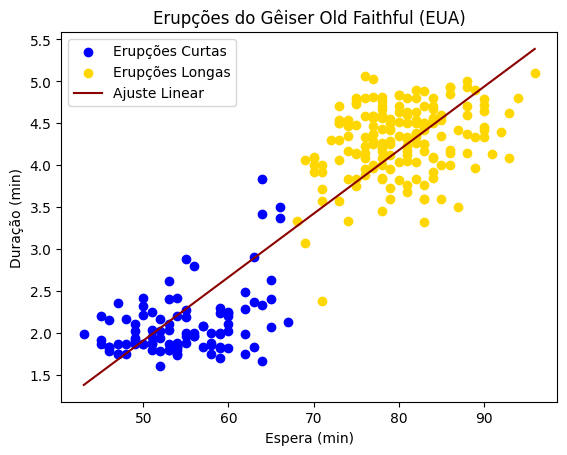

In [13]:
n = len(df_g)

kind = list(df_g["kind"])
dur = list(df_g["duration"])
wait = list(df_g["waiting"])

short = []
short_wait = []
long = []
long_wait=[]

for i in range (n):
    if kind[i]== "short":
        short.append(dur[i])
        short_wait.append(wait[i])
    elif kind[i]== "long":
        long.append(dur[i])
        long_wait.append(wait[i])

#plotagem dos dados
plt.scatter(short_wait, short, marker = "o", color="blue", label = "Erupções Curtas")
plt.scatter(long_wait, long, marker = "o", color="gold", label = "Erupções Longas")
plt.xlabel("Espera (min)")
plt.ylabel("Duração (min)")

#ajuste de curva
b0_g, b1_g = regressao_linear_simples(wait, dur)    
xfit_g = np.array(sorted(wait))
yfit_g = b0_g + b1_g*xfit_g
plt.plot(xfit_g, yfit_g, color = "darkred", label = "Ajuste Linear")

plt.title("Erupções do Gêiser Old Faithful (EUA)")
plt.legend()
plt.show()

In [14]:
short_intervalo = [min(short), max(short)]
long_intervalo = [min(long), max(long)]

short_int_wait = [min(short_wait), max(short_wait)]
long_int_wait = [min(long_wait), max(long_wait)]

print("Intervalo de tempo de duração (min) para erupções curtas:", short_intervalo)
print("Intervalo de tempo de duração (min) para erupções longas:", long_intervalo)
print(" ")
print("Intervalo de tempo de espera (min) para erupções curtas:", short_int_wait)
print("Intervalo de tempo de espera (min) para erupções longas:", long_int_wait)

Intervalo de tempo de duração (min) para erupções curtas: [1.6, 3.833]
Intervalo de tempo de duração (min) para erupções longas: [2.383, 5.1]
 
Intervalo de tempo de espera (min) para erupções curtas: [43, 67]
Intervalo de tempo de espera (min) para erupções longas: [68, 96]


In [15]:
print("Média de tempo de duração (min) para erupções curtas:", st.mean(short_intervalo))
print("Média de tempo de duração (min) para erupções longas:", st.mean(long_intervalo))
print("Média de tempo de duração (min) para todas as erupções:", st.mean(dur))
print(" ")
print("Média de tempo de espera (min) para erupções curtas:", st.mean(short_int_wait))
print("Média de tempo de espera (min) para erupções longas:", st.mean(long_int_wait))
print("Média de tempo de espera (min) para todas as erupções:", st.mean(wait))

Média de tempo de duração (min) para erupções curtas: 2.7165
Média de tempo de duração (min) para erupções longas: 3.7415
Média de tempo de duração (min) para todas as erupções: 3.487783088235294
 
Média de tempo de espera (min) para erupções curtas: 55
Média de tempo de espera (min) para erupções longas: 82
Média de tempo de espera (min) para todas as erupções: 70.8970588235294


<font color=black>Para melhor visualização dos dados, foi plotado um gráfico de pontos que relaciona a coluna de espera (wait) e a de duração (duration) de cada erupção do gêiser, além de sua identificação categórica (kind) por cores, sendo os pontos azuis referentes às erupções curtas e os amarelos a erupções longos. Com isso, fizemos uma regressão linear que melhor ajusta os dados, através do método de mínimos quadrados, mostrando a relação e dipersão destes - quanto maior a duração de uma erupção, maior o seu tempo de espera subsequente. Desse modo, pudemos perceber dois polos referentes a cada tipo de jatos, de modo que fique explícito que tal categoria foi definida com base no tempo de espera entre a erupção reportada e sua consequente (não em relação à sua duração, como seria mais intuitivo). Calculando mínimos e máximos para cada observação quantitativa, é possível perceber essa classificação: a duração (min) que configura erupções curtas está no intervalo fechado [1.6, 3.833], equanto para erupções longas o intervalo é de [2.383, 5.1], de modo que a sobreposição do máximo curto e do mínimo longo não deixa claro qual o critério das categorias; já para o tempo de espera (min), geisêres curtos tem espera entre [43, 67], enquanto longos, entre [68,96] - com o tempo de  esperas curtas e longas muito bem delimitados, provando que essa é a base para a classificação categórica dos dados. Ao final foram calculadas as médias de tempo de duração e espera dos tipos de erupção.

### Dataset - Penguins
 
O *dataset* "Penguins" do *Seaborn* contém dados de peso, tamanho do bico, altura  de três espécies de pinguins encontrados em três ilhas do Arquipélago Palmer.
 
<font color=black> As colunas correspondem aos seguintes dados:
* <font color=black> **species** :diz respeito às espécies dos pinguins;<br>
* <font color=black> **island** :diz respeito a ilha na qual o pinguim foi observado;<br>
* <font color=black> bill_length_mm:comprimento do bico;<br>
* <font color=black> bill_depth_mm:profundidade do bico;<br>
* <font color=black> flipper_length_mm:comprimento da asa;<br>
* <font color=black> body_mass_g:massa corporal do pinguim;<br>
* <font color=black> sex:sexo do pinguim;<br>

In [16]:
df_p = sb.load_dataset("penguins")
df_p = df_p.dropna()
df_p.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


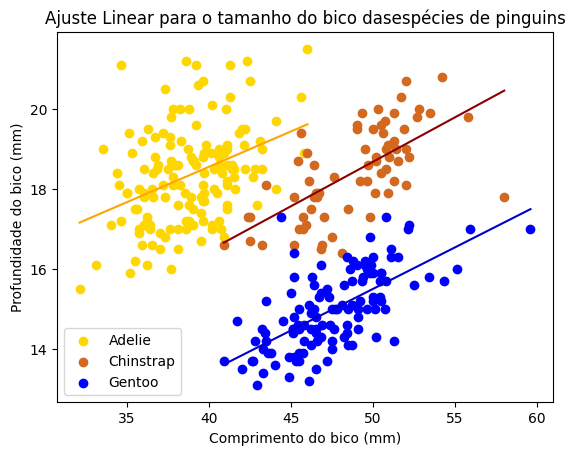

In [17]:
n = len(df_p)

bico_comp = list(df_p["bill_length_mm"])
bico_prof = list(df_p["bill_depth_mm"])
spc = list(df_p["species"])

bcomp_a = []
bprof_a = []
bcomp_c = []
bprof_c = []
bcomp_g = []
bprof_g = []

for i in range(n):
    if spc[i]== "Adelie":
        bcomp_a.append(bico_comp[i])
        bprof_a.append(bico_prof[i])
    elif spc[i]== "Chinstrap":
        bcomp_c.append(bico_comp[i])
        bprof_c.append(bico_prof[i])
    elif spc[i] == "Gentoo":
        bcomp_g.append(bico_comp[i])
        bprof_g.append(bico_prof[i])

#plotagem dos dados
plt.scatter(bcomp_a,bprof_a, color = "gold", label = "Adelie")
plt.scatter(bcomp_c,bprof_c, color = "chocolate", label = "Chinstrap")
plt.scatter(bcomp_g,bprof_g, color = "blue", label = "Gentoo")
plt.xlabel("Comprimento do bico (mm)")
plt.ylabel("Profundidade do bico (mm)")

#ajuste de curva - Adelie
b0_pa, b1_pa = regressao_linear_simples(bcomp_a,bprof_a)  
xfit_pa = np.array(sorted(bcomp_a))
yfit_pa = b0_pa + b1_pa*xfit_pa
plt.plot(xfit_pa,yfit_pa, color = "orange")

#ajuste de curva - Chinstrap
b0_pc,b1_pc= regressao_linear_simples(bcomp_c,bprof_c)  
xfit_pc = np.array(sorted(bcomp_c))
yfit_pc = b0_pc + b1_pc*xfit_pc
plt.plot(xfit_pc,yfit_pc, color = "darkred")

#ajuste de curva - Gentoo
b0_pg,b1_pg= regressao_linear_simples(bcomp_g,bprof_g)  
xfit_pg = np.array(sorted(bcomp_g))
yfit_pg = b0_pg + b1_pg*xfit_pg
plt.plot(xfit_pg,yfit_pg, color = "mediumblue")

plt.title("Ajuste Linear para o tamanho do bico dasespécies de pinguins")
plt.legend()
plt.show()

In [18]:
print("Intervalo de comprimento do bico (mm) para pinguins Adelie:", [min(bcomp_a),max(bcomp_a)])
print("Intervalo de profundidade do bico (mm) para pinguins Adelie:", [min(bprof_a),max(bprof_a)])
print(" ")
print("Intervalo de comprimento do bico (mm) para pinguins Chinstrap:", [min(bcomp_c),max(bcomp_c)])
print("Intervalo de profundidade do bico (mm) para pinguins Chinstrap:", [min(bprof_c),max(bprof_c)])
print(" ")
print("Intervalo de comprimento do bico (mm) para pinguins Gentoo:", [min(bcomp_g),max(bcomp_g)])
print("Intervalo de profundidade do bico (mm) para pinguins Gentoo:", [min(bprof_g),max(bprof_g)])

Intervalo de comprimento do bico (mm) para pinguins Adelie: [32.1, 46.0]
Intervalo de profundidade do bico (mm) para pinguins Adelie: [15.5, 21.5]
 
Intervalo de comprimento do bico (mm) para pinguins Chinstrap: [40.9, 58.0]
Intervalo de profundidade do bico (mm) para pinguins Chinstrap: [16.4, 20.8]
 
Intervalo de comprimento do bico (mm) para pinguins Gentoo: [40.9, 59.6]
Intervalo de profundidade do bico (mm) para pinguins Gentoo: [13.1, 17.3]


In [19]:
print("Média de comprimento do bico (mm) para pinguins Adelie:", st.mean(bcomp_a))
print("Média de comprimento do bico (mm) para pinguins Chinstrap:", st.mean(bcomp_c))
print("Média de comprimento do bico (mm) para pinguins Gentoo:", st.mean(bcomp_g))
print("Média de comprimento do bico (mm) para todos do pinguins:", st.mean(bico_comp))
print(" ")
print("Média de profundidade do bico (mm) para pinguins Adelie:", st.mean(bprof_a))
print("Média de profundidade do bico (mm) para pinguins Chinstrap:", st.mean(bprof_c))
print("Média de profundidade do bico (mm) para pinguins Gentoo:", st.mean(bprof_g))
print("Média de profundidade do bico (mm) para todos do pinguins:", st.mean(bico_prof))

Média de comprimento do bico (mm) para pinguins Adelie: 38.82397260273973
Média de comprimento do bico (mm) para pinguins Chinstrap: 48.83382352941177
Média de comprimento do bico (mm) para pinguins Gentoo: 47.568067226890754
Média de comprimento do bico (mm) para todos do pinguins: 43.99279279279279
 
Média de profundidade do bico (mm) para pinguins Adelie: 18.3472602739726
Média de profundidade do bico (mm) para pinguins Chinstrap: 18.42058823529412
Média de profundidade do bico (mm) para pinguins Gentoo: 14.996638655462185
Média de profundidade do bico (mm) para todos do pinguins: 17.164864864864864


Aqui, escolhemos analisar dados do tamanho do bico dos pinguins, importantes ferramentas hidrodinâmicas no deslocamento desses animais. Para isso, fizemos a plotagem dos dados em um gráfico de pontos que relaciona o comprimento e a profundidade do bico dos indivíduos observados, identificando-os com cores de acordo com as espécies. Além disso, foi feito um ajuste de dados para cada espécie, através do método de mínimos quadrados, visto que as características observadas apresentam comportamentos diferentes, ainda que similares. Em ambas, comprimento e profundidade estão relacionadas de maneira crescente, entretanto Adelie tendem a apresentar bicos curtos e grossos, Gentoo tendem a apresentar bicos longos e finos, e Chinstrap tendem a apresentar bicos com comprimento e profundidades medianas.

<font color=darkred>Conclusão da missão 2<br>
<font color=black> Com essa coleta, foi possível conhecer mais sobre dados marinhos em Lumi, analisando e visualizando alguns deles na forma de gráficos. Dessa forma, foi possível conhecer melhor o reino e a Biblioteca Real, assim como a importância do conjunto e da análise de dados para entender populações, eventos e fenômenos, além do resumo geral oferecido pelas estatísticas descritivas.

### <font color=darkred> Referências
 
CASSAR, DR. ATP-203 1.1 Tratamento de dados. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.
 
CASSAR, DR. ATP-203 3.0 Modelo linear e baseline. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.
tem menu de contexto

HORST, A. palmerpenguins: A great intro dataset for data exploration & visualization (alternative to iris). [s.l: s.n.].


R: Old Faithful Geyser Data. Disponível em: <https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/faithful.html>. Acesso em: 24 ago. 2024.


Titanic - machine learning from disaster. Disponível em: <https://www.kaggle.com/c/titanic/data>. Acesso em: 24 ago. 2024.


WASKOM, M. seaborn-data: Data repository for seaborn examples. [s.l: s.n.].

